## Importando librerías

Se importan las librerias necesarias para trabajar    </n>

keras </n>

datasets = nos presenta los datos con los cuales se trabajara </n>

laters models = son las capas de la red y el modelo general de la red</n>

numpy es una libreria para menejo de datos numericos (vectores,matrices)</n>

matplotlib.pyplot = es una libreria para crear graficas </n>



In [1]:

from keras.datasets import mnist
from keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Nuestro set de datos

Se extraen los datos de keras que son las imagenes 0-9 junto a una tag de su valor

Se almacena las dos partes(datos de entrenamiento y de testeo) cada una de las imagenes con su respectivo tag 

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Contamos con 60000 imagenes de  tamaño 28x28

In [3]:
train_data.shape

(60000, 28, 28)

Son valores de 0-255 ya que es la escala tanto para rgb como para escala de colores

In [4]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Como se ve a continuacion con el metodo de plt imshow podemos ver la imagen 28*28 con sus respectivos colores formando el numero

como se ve el elemento 0 coincide con el tag 0

<function matplotlib.pyplot.show>

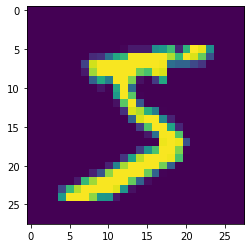

In [5]:
plt.imshow(train_data[0])
plt.show

In [6]:
train_labels[0]

5

## Creando un modelo de datos

Ahora se crea el modelo de sobre de redes neuronales


seguido a ello se crean las capas del modelo que en este caso seran dos

la primera es una capa con la funcion de activacion relu con entrada 28*28 que es el tamaño de la imagen

y la segunda con tamaño dos ya que son las posibles salidas es decir los numeros de 0-9

In [7]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

Se compila el modelo con una funcion de activacion, una de perdida y una metrica sobre la preciscion 

In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Limpieza de datos

Ahora los es necesario limpiar los datos lo primero es cambiar la forma de los datos de 3 dimenciones a 2

luego se dividira los valors dentro de los datos en 255 para tener un rango entre 0-1 ya que la red neuronal trabaja mejor con decimales


In [9]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

Luego se vuelven categorias los labels para poder identificar si son correctas las predicciones donde estan los 10 posibles valores

In [10]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [11]:
train_labels[0]

5

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Entrenando el modelo

Ahora toca empezar a entrenar la red neuronal esto se hace acomodando los datos en el modelo. con los parametros de metodo son la data de entrenamiento sus tags,

 los epochs que son el numero de "iteraciones" por la que todos los datos pasaran por la red 
 
  el batch size es el numero de registros sobre los cuales se realiza el backprogation es decir cada 128 entradas se realiza el proceso

In [13]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2558 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1040 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0502 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0374 - accuracy: 0.9887


## Evaluando sobre data de test

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9771


[0.07347685843706131, 0.9771000146865845]